<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/08_Min_DFA/MT1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

### Showing why it is hard to concatenate DFA and why they are exponential sometimes

  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

In [ ]:
# How can we concatenate D1 and D2? Can't put a bridge from D1's final state to D2's initlal state. What will the bridge be labeled by?
# I'll use RE to draw DFA quickly... that part will be explained later.
# D1's language is "ab" and that of D2 is "cd"

D1 = min_dfa(nfa2dfa(re2nfa("ab")))
dotObj_dfa_w_bh(D1,FuseEdges=True)

In [ ]:
D2 = min_dfa(nfa2dfa(re2nfa("cd")))
dotObj_dfa_w_bh(D2,FuseEdges=True)

### Can't bridge from the first DFA's St4 to the second DFA's initial state (or other things)... there is no direct concatenation approach.

In [ ]:
# Now let's see DFA for "Nth-last bit is a 1" grow exponentially large as N increases
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1"))))


In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)"))))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)"))))

### It is getting larger; so let's check how the number of states grow.

In [ ]:
min_dfa(nfa2dfa(re2nfa("(0+1)*1")))

In [ ]:
# So, to determine the number of states, index-out the Python dictionary at "Q"
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1")))["Q"])

In [ ]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)")))["Q"])

In [ ]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)")))["Q"])

In [ ]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)")))["Q"])

In [ ]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)(0+1)")))["Q"])

#### OK, we see that
* The RE grows only by a length of five symbols, i.e. (0+1) and in the long run, it is a linear growth
* The generated DFA grows exponentially (exp number of states w.r.t. N)

### You may say what about the NFA?
* Well, we will show you what NFA are in a minute.
* But we will assure you (and soon show you) that the NFA will grow only by the number of states it takes to represent (0+1) and that will also be a fixed (small) number.



### **Here is a way to see various machines and play with them using the Jove Editor**

* Let's build many NFA using this Jove editor and animate
* The NFA to be built are these
  - NFA1  that moves to two states, i.e. I : a -> A, F
  - *IMMEDIATELY* notice that the DFA complementation algorithm does not work for NFA --- in fact there is no direct way to complement NFA
  - NFA2 that moves as follows : I : '' -> F
  - NFA3 that moves as follows
     - I1 : '' -> A
     - I2 : a -> F
  - NFA4 that moves as follows
     - I1 : a -> F1
     - I2 : b -> F2

* The language of an NFA
  - The language of an NFA is any string that takes the NFA from *some* starting state through a path (that may contain epsilon) to some final state


In [ ]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

## INTRODUCING YOUR FIRST NFA, AND SIMULATING IT

In [ ]:
# I'm going to redraw the NFA of Figure 7.7 as one with multiple initial states
# This is achieved using two initial states that start with the "I" state
# States with multiple next states upon one symbol are shown with a comma-separated list of next states

nfa_Fig7_dot_7_Variant = md2mc('''NFA
IA : '' -> B, C  !! multiple initial states
IG : 1  -> F     !! a dead-end state
B  : 1  -> D
C  : 0  -> E
D : ''  -> IA, IG
E : ''  -> IA, IG
''')


In [ ]:
dotObj_nfa(nfa_Fig7_dot_7_Variant, FuseEdges=True)

In [ ]:
# To see what the formal structure of this NFA is, let's look at its Delta function
nfa_Fig7_dot_7_Variant

### We see that the NFA transitions to multiple next states upon a single symbol
### In some cases it only transitions to ONE next state
### To treat these cases uniformly, we say that an NFA transitions to a **set** of next states each time





* The formal structure of an NFA is this : $(Q, \Sigma, \delta, Q_0, F)$
* This basically means ``An NFA is these five things''
* Here $Q$ is a finite set of states
* $\Sigma$ is as before (the actual alphabet). Even if an NFA moves on $\varepsilon$, the alphabet NEVER includes $\varepsilon$
* $\delta$ maps a state paired with either $\Sigma$ or $\varepsilon$ to a set of states
* $Q_0$ is a subset of states
* $F$ is a subset of $Q$



---------------------

### NOW for the fun experience. Let's animate the NFA to watch all of its conceptual steps!


In [ ]:
from jove.AnimateNFA import *

In [ ]:
AnimateNFA(nfa_Fig7_dot_7_Variant, FuseEdges=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

------------------------------------


### BACKGROUND MATERIAL TO TEACH YOU SOME BASICS + HAVE YOU DO QUIZ-3

### The idea of regular expressions will be reinforced in this exercise. When we have the language $\{a,bc\}\{d\}+\varepsilon$, the regular expression corresponding to this is (a+bc)(d)('') or even (a+bc)d('') or finally also (a+bc)d'' where we assume that having the parenthesis around d and '' makes it more readable. Let's test this out.

In [ ]:
# You may put parentheses around the '' string as below
dotObj_nfa(re2nfa("(a+bc)(d)('')"))

In [ ]:
# In this case, the parser is smart enough to work even w/o the parentheses
dotObj_nfa(re2nfa("(a+bc)d''"))

-------------------------
-------------------------
# START OF QUIZ-3
-------------------------
-------------------------

### Question-1: Teaches you about Regular Expressions. Be reading Chapter 8 of the book.

* Given any alphabet $\Sigma$ (say $\Sigma = \{a,b\}$), here are all the regular expressions (RE)
  - $\varepsilon$ is a RE *denoting the language* with the empty string \{ $\varepsilon$ \}, otherwise known as the Unit language
     - We will say $L$($\varepsilon$) = \{ $\varepsilon$ \}
     - Or in a more friendly syntax, $L$('') = \{ $\varepsilon$ \}
  - $x \in \Sigma$ is an RE. For us, a and b are REs.
     - a is an RE. I.e. $L$(a) = \{ $a$\}
     - Similarly, b is an RE. I.e. $L$(b) = \{$b$\}
  - If $R_1$ and $R_2$ are RE, then
     - $R_1 + R_2$ is an RE.  
       - More specifically $L$($R_1$ + $R_2$) = $L$($R_1$) $\cup$ $L$($R_2$)
     - $R_1 R_2$ is an RE
       - More specifically $L$($R_1$  $R_2$) = $L$($R_1$)  $L$($R_2$)
  - If $R$ is an RE, then $R^*$ is an RE denoting \{ L($R$) \}$^*$

### What is the language of this RE? ((a+bc)d(''))*
### Ans: $((\{a\}\cup(\{b\}\{c\}))(\{d\})(\{ '' \}))^*$

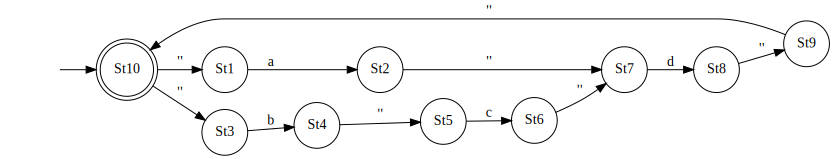

In [73]:
# What is the language denoted by the RE ((a+bc)d(''))* ? Let's find out
dotObj_nfa(re2nfa("((a+bc)d(''))*"))
# We will find it out by reading-out the language of the NFA...

#### Question-1: What is the rule for doing a Concatenation? Select in the Quiz!

## Question-2

-----------------------

#### Question-2 : What is the rule for doing an "OR" or + ?  . Select in the Quiz!

------------------------------

## Question-3

-----------------------

#### Question-3: What is the rule for doing a star ?  Select in the Quiz!

------------------------------

## Question-4

-----------------------

#### Question-4: What is the relationship between the RE (a+b)* and (a*b*)* ?

#### Select in the Quiz!

------------------------------

## Question-5

-----------------------

#### Question-5: How do I check the work in Question 4?  Select in the Quiz! Notice I deliberately leave out one min_dfa!

In [81]:
D1 = min_dfa(nfa2dfa(re2nfa("(a*b*)*")))
D2 = nfa2dfa(re2nfa("(a+b)*"))

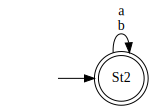

In [82]:
dotObj_dfa(D1, FuseEdges=True)

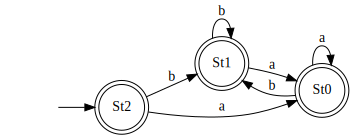

In [83]:
dotObj_dfa(D2, FuseEdges=True)

In [84]:
langeq_dfa(D1,D2)

True

In [85]:
iso_dfa(D1,D2)

False

------------------------------

## Question-6

-----------------------

#### Question-6: How does min_dfa work? Let's find out! Select in the Quiz!

In [92]:
REno010 =   "1* ( '' + 00* ( '' + 1(11*00*1)* ( '' + 11* ( '' + 00* ))))"
unmin_no010_RE = nfa2dfa(re2nfa(REno010))
min_no010_RE = min_dfa(unmin_no010_RE)

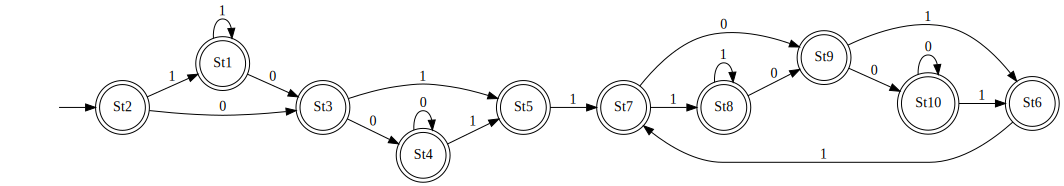

In [93]:
dotObj_dfa(unmin_no010_RE, FuseEdges=True)

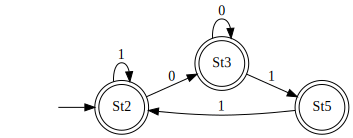

In [94]:
dotObj_dfa(min_no010_RE, FuseEdges=True)

In [95]:
# Let's see the Dyn Prog Algo
no010_RE = min_dfa(nfa2dfa(re2nfa(REno010)), chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  St2  and  BH  are 0-distinguished.
States  St5  and  BH  are 0-distinguished.
States  BH  and  St9  are 0-distinguished.
States  BH  and  St7  are 0-distinguished.
States  BH  and  St6  are 0-distinguished.
States  BH  and  St10  are 0-distinguished.
States  BH  and  St8  are 0-distinguished.
States  BH  and  St1  are 0-distinguished.
States  BH  and  St3  are 0-distinguished.
States  BH  and  St4  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 St5 	 .
	 BH 	 0	0
	 St9 	 .	.	0
	 St7 	 .	.	0	.
	 St6 	 .	.	0	.	.
	 St10 	 .	.	0	.	.	.
	 St8 	 .	.	0	.	.	.	.
	 St1 	 .	.	0	.	.	.	.	.
	 St3 	 .	.	0	.	.	.	.	.	.
	 St4 	 .	.	0	.	.	.	.	.	.	.

		 St2	St5	BH	St9	St7	St6	St10	St8	St1	St3
----------------------

------------------------------

## Question-7

-----------------------

------------------------------

## Question-8

-----------------------

------------------------------

## Question-9

-----------------------

------------------------------

## Question-10

-----------------------

------------------------------

### This notebook BELOW was assigned for MT1 practice in 2022. You can see that below this text box and keep that in mind as a learning goal. But above this text box, I have set material for Quiz-5 that gradually builds toward this goal.

In [ ]:
def diff_RE(R1,R2):
    '''
    Given R1 and R2, here is the the code to return (D1,D2)
    where D1 is the min DFA of Lang(R1)-Lang(R2)
    and D2 is the min DFA of Lang(R2)-Lang(R1)
    '''
    MD1=min_dfa_brz(nfa2dfa(re2nfa(R1)))
    MD2=min_dfa_brz(nfa2dfa(re2nfa(R2)))

    cMD1 = comp_dfa(MD1)
    cMD2 = comp_dfa(MD2)

    D1minus2 = min_dfa_brz(intersect_dfa(MD1, cMD2))
    D2minus1 = min_dfa_brz(intersect_dfa(MD2, cMD1))

    return (D1minus2, D2minus1)


In [ ]:
# Sigma = {0,1}; "2n zeros for n >= 0"

RE2 = "(1* 0 1* 0 1*)*"
m2 = min_dfa(nfa2dfa(re2nfa(RE2)))
dotObj_dfa(m2)

In [ ]:
dotObj_dfa(m2).render('m2')

In [ ]:
# 3n 0's, n >= 0

RE3 = "(1* 0 1* 0 1* 0 1*)*"
m3 = min_dfa(nfa2dfa(re2nfa(RE3)))
dotObj_dfa(m3)

In [ ]:
dotObj_dfa(m3).render('m3')

In [ ]:
dfa2big = nfa2dfa(re2nfa(RE2))
dotObj_dfa(dfa2big)

In [ ]:
dfa_unmin = md2mc('''

DFA
IF : 1  ->  St3
IF : 0  ->  St4
St4: 0  ->  F0
St4: 1  ->  St5
St3: 0  ->  St4
St3: 1  ->  St3
F0 : 0  ->  St4
F0 : 1  ->  F1
St5: 0  ->  F0
St5: 1  ->  St5
F1 : 0  ->  St4
F1 : 1  ->  F1
''')

In [ ]:
dotObj_dfa(dfa_unmin).render('dfa_unmin')

In [ ]:
dfa_min = min_dfa(dfa_unmin, state_name_mode = 'verbose', chatty=True)

In [ ]:
dfa_unmin_rev = rev_dfa(dfa_unmin)

In [ ]:
dotObj_nfa(dfa_unmin_rev).render('dfa_unmin_rev')

In [ ]:
help(nfa2dfa)

In [ ]:
dotObj_nfa(dfa_unmin_rev)

In [ ]:
dfa_unmin_rev_det = nfa2dfa(dfa_unmin_rev, STATENAME_MAXSIZE=80)

In [ ]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80)

In [ ]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80).render('dfa_unmin_rev_det')

In [ ]:
dotObj_dfa(dfa_min)

In [ ]:
mEven0_mOdd0 = intersect_dfa(m2,m3)

In [ ]:
dotObj_dfa(mEven0_mOdd0)

In [ ]:
dotObj_dfa(mEven0_mOdd0).render('m2_and_m3')

In [ ]:
nfa0s1s0 = re2nfa("0* 1* 0")
dotObj_nfa(nfa0s1s0)

In [ ]:
dotObj_nfa(nfa0s1s0).render('nfa0s1s0')

In [ ]:
dfa0s1s0 = nfa2dfa(nfa0s1s0, STATENAME_MAXSIZE=80)

In [ ]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80)

In [ ]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80).render('dfa0s1s0')

In [ ]:
no010 = md2mc('''
DFA
IF : 1 -> IF
IF : 0 -> F0

F0 : 0 -> F0
F0 : 1 -> F1

F1 : 0 -> BH
F1 : 1 -> IF

BH : 0|1 -> BH

''')

In [ ]:
dotObj_dfa(no010)

In [ ]:
dotObj_dfa(no010).render('no010')

# To verify, define has010 and intersect.

In [ ]:
has010 = min_dfa(nfa2dfa(re2nfa("(0+1)*010(010)*")))

In [ ]:
dotObj_dfa(has010)

In [ ]:
no010_and_has010 = intersect_dfa(no010, has010)

In [ ]:
dotObj_dfa(no010_and_has010)

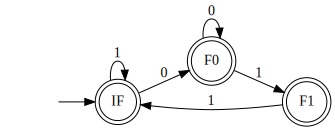

In [87]:
dotObj_dfa(no010)

In [88]:
REno010 =   "1* ( '' + 00* ( '' + 1(11*00*1)* ( '' + 11* ( '' + 00* ))))"

In [90]:
no010_RE = min_dfa(nfa2dfa(re2nfa(REno010)), chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  St2  and  BH  are 0-distinguished.
States  St5  and  BH  are 0-distinguished.
States  BH  and  St9  are 0-distinguished.
States  BH  and  St7  are 0-distinguished.
States  BH  and  St6  are 0-distinguished.
States  BH  and  St10  are 0-distinguished.
States  BH  and  St8  are 0-distinguished.
States  BH  and  St1  are 0-distinguished.
States  BH  and  St3  are 0-distinguished.
States  BH  and  St4  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 St5 	 .
	 BH 	 0	0
	 St9 	 .	.	0
	 St7 	 .	.	0	.
	 St6 	 .	.	0	.	.
	 St10 	 .	.	0	.	.	.
	 St8 	 .	.	0	.	.	.	.
	 St1 	 .	.	0	.	.	.	.	.
	 St3 	 .	.	0	.	.	.	.	.	.
	 St4 	 .	.	0	.	.	.	.	.	.	.

		 St2	St5	BH	St9	St7	St6	St10	St8	St1	St3
----------------------

In [ ]:
dotObj_dfa(no010_RE)

In [ ]:
nfano010 = dfa2nfa(no010)

In [ ]:
dotObj_nfa(nfano010)

In [ ]:
gnfa010 = mk_gnfa(nfano010)

In [ ]:
dotObj_gnfa(gnfa010)

In [ ]:
help(del_gnfa_states)

In [ ]:
(GF,DO,RE) = del_gnfa_states(gnfa010)

In [ ]:
RE

In [ ]:
DO[0]

In [ ]:
DO[1]

In [ ]:
DO[2]

In [ ]:
DO[3]